In [1]:
import numpy as np
import plotly.express as px
# import matplotlib.pyplot as plt
# from mpl_interactions import ioff, panhandler, zoom_factory
from scipy.special import hermite
%matplotlib widget

Step 1: Take an arbitrary set of coefficients and plot the wavefunction

Step 2: Do this in 2D? or maybe have it time evolving?


In [2]:
def qho_n(n, x, m, h_bar, omega):
    xi = np.sqrt(m*omega/h_bar)*x
    A_n = np.math.pow((m*omega)/(np.pi*h_bar), 0.25)/np.sqrt(np.math.factorial(n)*(2**n))
    psi_n = A_n*hermite(n)(xi)*np.exp(-np.square(xi)/2)
    return psi_n

class WaveFunction:

    def __init__(self, coeff, 
                 x_min=-100, 
                 x_max=100, 
                 resolution=10000,
                 m=1,
                 omega=1,
                 h_bar=1):
        self.coeffs = self.normalize(coeff)
        self.x_max, self.x_min, self.resolution = x_max, x_min, resolution
        self.x = np.linspace(x_min, x_max, resolution)
        self.psi= np.zeros(resolution)

        for i in coeff:
            self.psi+= coeff[i]*qho_n(i, self.x, m, h_bar, omega)

    def normalize(self, coeffs):
        if isinstance(coeffs, list):
            s = np.sum(np.square(np.array(coeffs)))

        if isinstance(coeffs, dict):
            _temp = np.zeros(max(coeffs.keys())+1)
            for i in coeffs:
                _temp[i] = coeffs[i]
            coeffs = _temp
            s = np.sum(np.square(np.array(coeffs)))
            
        if s==1:
            return np.array(coeffs)
        else:
            return np.array(coeffs)/s
        
    
    def is_normalized(self):
        return np.isclose(np.sum((self.psi**2)*(self.x_max-self.x_min)/self.resolution), 1)


class Plotter:

    def __init__(self, figsize=[20,6]):
        self.figsize = figsize

    def plotWaveFunction(self, wf, showyaxis=False):
        figure = plt.figure(figsize=self.figsize)
        ax = figure.add_subplot(1,1,1)
        ax.spines['left'].set_position('center')
        plt.plot(wf.x, wf.psi)
        plt.axvline(0, color='black')
        plt.axhline(0.0, xmin=wf.x_min, xmax=wf.x_max, color='black')
        plt.xticks(visible=False)
        plt.yticks(visible=showyaxis)
        plt.show()

    def plotProbability(self, wf, showyaxis=False):
        figure = plt.figure(figsize=self.figsize)
        ax = figure.add_subplot(1,1,1)
        ax.spines['left'].set_position('center')
        plt.plot(wf.x, np.square(wf.psi))
        plt.axvline(0, color='black')
        plt.axhline(0.0, xmin=wf.x_min, xmax=wf.x_max, color='black')
        plt.xticks(visible=False)
        plt.yticks(visible=showyaxis)
        plt.show()


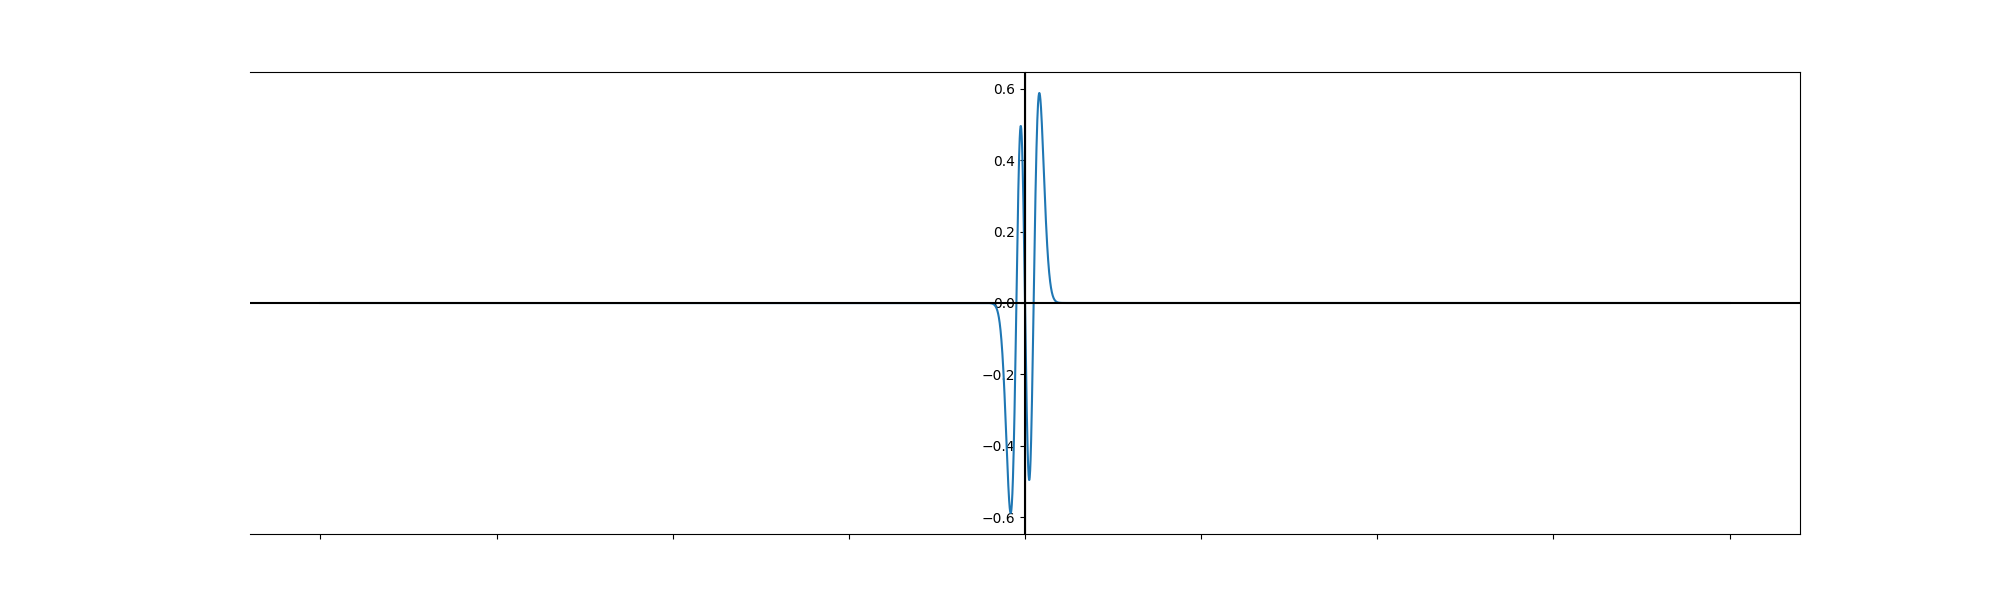

In [3]:
wf = WaveFunction({3:1})
plotter = Plotter()
plotter.plotWaveFunction(wf, True)

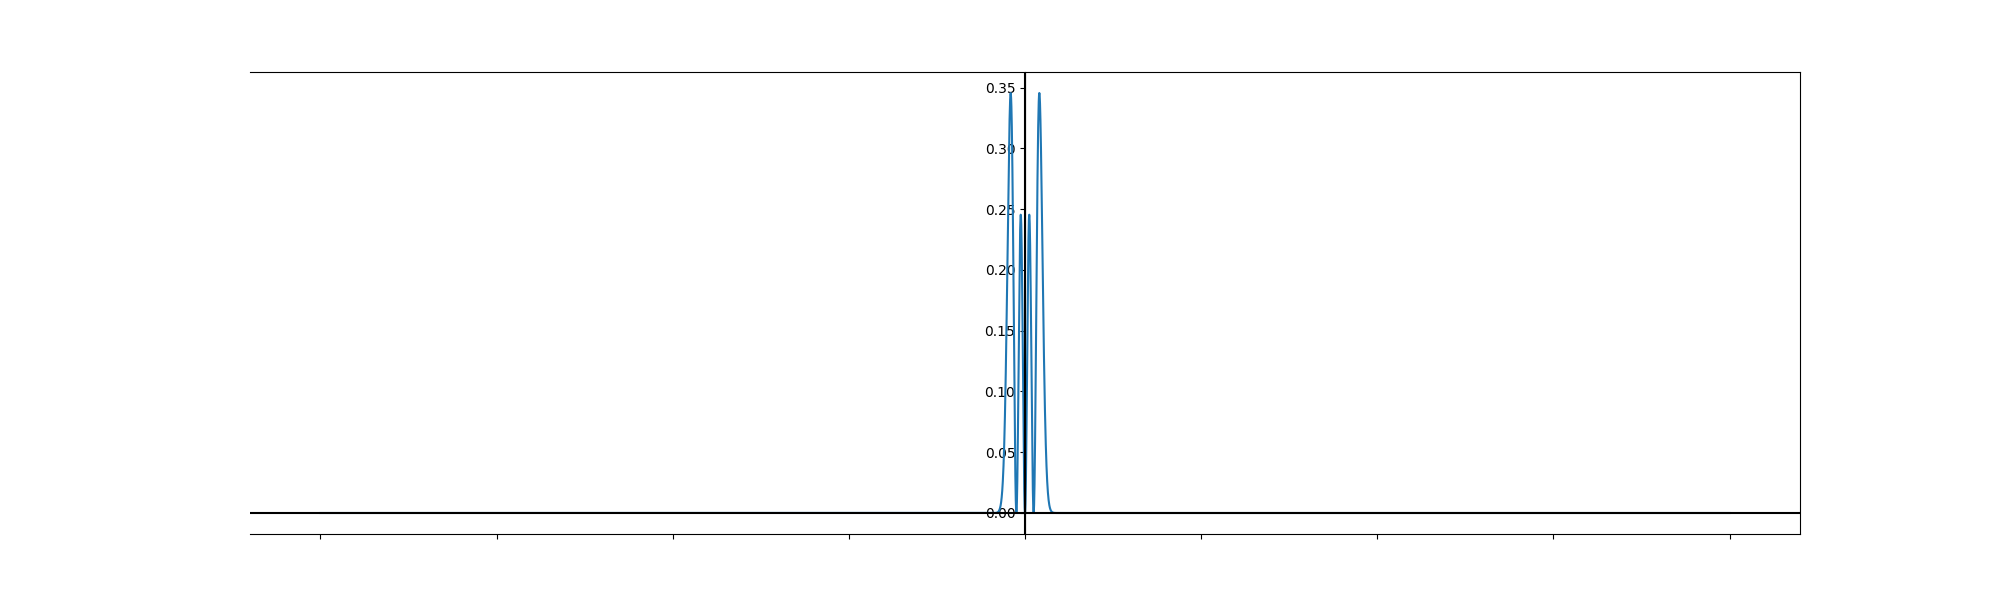

In [4]:
plotter.plotProbability(wf, True)

In [288]:
wf.is_normalized()

False